In [1]:
from pathlib import Path
from IPython.display import HTML, display
css = Path("../../../css/rtl.css").read_text(encoding="utf-8")
display(HTML(f"<style>{css}</style>"))


# فصل ۳ — تحلیل اکتشافی داده‌ها (EDA)
## درس ۲: روابط دوتایی (همبستگی، نمودارهای پراکندگی)


### اهداف یادگیری

در پایان این درس، شما قادر خواهید بود:

- تفاوت **ارتباط** (association) با **علیت** (causation) را توضیح دهید و دقیقاً بیان کنید همبستگی چه چیزی را نشان می‌دهد و چه چیزی را اثبات نمی‌کند.
- همبستگی‌های **پیرسون**، **اسپیرمن** و **کندال** را محاسبه و تفسیر کنید (و بدانید هر کدام چه زمانی مناسب‌تر است).
- با استفاده از **نمودارهای پراکندگی** و ابزارهای مکمل (خط روند، نمای باقی‌مانده‌ها، تبدیل لگاریتمی) موارد زیر را تشخیص دهید:
  - رابطهٔ خطی در برابر غیرخطی،
  - ناهمسانی واریانس (heteroscedasticity)،
  - نقاط پرت و نقاط با نفوذ بالا (leverage)،
  - ساختار زیرگروهی و سیگنال‌های مخدوش‌کننده (confounding).
- برای متغیرهای ترکیبی (عدد/دسته)، معیار مناسب را انتخاب کنید:
  - point-biserial (عددی ↔ دودویی)،
  - نسبت همبستگی $\eta^2$ (دسته‌ای ↔ عددی)،
  - معیار $V$ کرامر (دسته‌ای ↔ دسته‌ای).
- یک جریان کاری **قابل تکرار** برای EDA دوتایی بسازید که مستقیماً به تصمیم‌های مدل‌سازی منجر شود (تبدیل‌ها، انتخاب ویژگی، و بررسی لیکیج).

### EDA دوتایی: دستاوردهای عملی

تحلیل روابط دوتایی کوتاه‌ترین مسیر از «یک CSV دارم» به «می‌دانم چه مدل‌هایی مناسب‌اند» است. این تحلیل موارد زیر را آشکار می‌کند:

- **افزونگی** (دو ستون تقریباً تکراری‌اند یا یک مفهوم را می‌سنجند).
- **یکنوا بودن** (می‌توان ویژگی را آستانه‌گذاری/بِین کرد یا با قید یکنوایی مدل کرد).
- **غیرخطی بودن** (تبدیل‌ها، جمله‌های چندجمله‌ای، اسپلاین‌ها، یا مدل‌های درختی را پیشنهاد می‌کند).
- **ناهمسانی واریانس** (واریانس با سطح متغیر تغییر می‌کند؛ روی تشخیص رگرسیون و انتخاب زیان اثر دارد).
- **نقاط پرت** (رویدادهای نادر، خطای ورود داده، یا موارد واقعاً افراطی—هر کدام برخورد متفاوت می‌خواهد).
- **اثر زیرگروه‌ها** (رابطه در دسته‌ها متفاوت است؛ نشانهٔ برهم‌کنش).

### ستون فقرات ریاضی: کوواریانس و همبستگی

برای متغیرهای تصادفی $X$ و $Y$ با ممان دوم محدود، کوواریانس:

$$
\mathrm{Cov}(X,Y) = \mathbb{E}[(X-\mathbb{E}[X])(Y-\mathbb{E}[Y])].
$$

تخمین نمونه‌ای رایج:

$$
\widehat{\mathrm{Cov}}(X,Y) = \frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}).
$$

همبستگی پیرسون، کوواریانس نرمال‌شده با انحراف معیارهاست:

$$
\rho_{X,Y} = \frac{\mathrm{Cov}(X,Y)}{\sigma_X \sigma_Y}
\quad\Rightarrow\quad
\hat{\rho}_{X,Y} = \frac{\widehat{\mathrm{Cov}}(X,Y)}{s_X s_Y}.
$$

#### تفسیر هندسی (یک شهود بسیار مفید)

بردارهای مشاهده را $x$ و $y$ بگیرید و بردارهای مرکز‌شده $\tilde{x}=x-\bar{x}\mathbf{1}$ و $\tilde{y}=y-\bar{y}\mathbf{1}$ را تعریف کنید. آنگاه:

$$
\hat{\rho}_{X,Y} = \frac{\tilde{x}^\top \tilde{y}}{\|\tilde{x}\|\,\|\tilde{y}\|}.
$$

پس همبستگی پیرسون در واقع **کسینوس زاویه** بین بردارهای مرکز‌شده است. این شهود فوراً توضیح می‌دهد:

- $\rho=1$ یعنی «هم‌جهت» (رابطهٔ خطی مثبتِ کامل)،
- $\rho=-1$ یعنی «خلاف‌جهت» (رابطهٔ خطی منفیِ کامل)،
- $\rho=0$ یعنی عمود بودن در فضای مرکز‌شده (بدون ارتباط خطی).

به همین دلیل همبستگی نسبت به مقیاس‌دهی و انتقال (تا علامت) ناورداست.

### همبستگی‌های رتبه‌ای

اگر رابطه **یکنوا اما غیرخطی** باشد، معیارهای رتبه‌ای معمولاً گویا‌ترند:

- اسپیرمن: پیرسون روی رتبه‌ها  
  $$
  \rho_S = \mathrm{Corr}(\mathrm{rank}(X),\mathrm{rank}(Y)).
  $$
- $\tau$ کندال: بر پایهٔ زوج‌های همساز و ناساز  
  $$
  \tau = \frac{(\#\text{همساز})-(\#\text{ناساز})}{\binom{n}{2}}.
  $$

در داده‌های واقعی «تساوی» (tie) زیاد رخ می‌دهد؛ پیاده‌سازی‌های عملی از نسخه‌های اصلاح‌شده برای tie (مثل $\tau_b$) استفاده می‌کنند.

### نمودار پراکندگی: «همبستگی با چهره»

یک عدد همبستگی می‌تواند ساختار را پنهان کند. نمودار پراکندگی به شما اجازه می‌دهد ببینید:

- خمیدگی (تبدیل یا مدل غیرخطی)،
- نقاط پرت و نقاط با نفوذ بالا،
- بخش‌بندی (خوشه‌ها/زیرگروه‌ها)،
- ناهمسانی واریانس،
- آثار گسسته‌سازی (مثلاً گرد کردن یا دسته‌بندی).

در عمل، همبستگی را محاسبه کنید **و** برای زوج‌های مهم نمودار پراکندگی را ببینید.

---



## ۱) آماده‌سازی: کتابخانه‌ها و ابزارهای کمکی

برای تمرین تحلیل روابط دوتایی، از چند دیتاست مختلف در مخزن شما استفاده می‌کنیم تا حالت‌های گوناگون را ببینیم:

- روابط کاملاً عددی،
- هدف عددی (رگرسیون)،
- هدف دسته‌ای (طبقه‌بندی)،
- ارتباط دسته‌ای↔عددی.

توابع کمکی زیر یک جریان کاری قابل تکرار فراهم می‌کنند:

- بارگذاری CSV با مسیرهای نسبی مطابق ساختار مخزن،
- تشخیص خودکار ستون‌های عددی،
- ساخت جدول همبستگی و استخراج «قوی‌ترین زوج‌ها»،
- توابع رسم فشرده که در کل درس استفاده می‌شوند.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 140)
pd.set_option('display.width', 160)
sns.set_context('notebook')

def load_csv(rel_path: str) -> pd.DataFrame:
    path = Path(rel_path)
    if not path.exists():
        raise FileNotFoundError(f"CSV not found at: {path.resolve()} (expected relative path: {rel_path})")
    return pd.read_csv(path)

def coerce_numeric(df: pd.DataFrame, cols=None) -> pd.DataFrame:
    out = df.copy()
    if cols is None:
        cols = out.columns
    for c in cols:
        if out[c].dtype == 'object':
            try:
                out[c] = pd.to_numeric(out[c])
            except Exception:
                # Keep original if conversion is not possible
                pass
    return out

def numeric_columns(df: pd.DataFrame):
    return [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]

def correlation_table(df: pd.DataFrame, method: str = 'pearson') -> pd.DataFrame:
    num = df[numeric_columns(df)].copy()
    return num.corr(method=method)

def top_abs_correlations(corr: pd.DataFrame, k: int = 12) -> pd.DataFrame:
    c = corr.copy()
    np.fill_diagonal(c.values, np.nan)
    # pandas >= 2.1 introduces stack(..., future_stack=True) where dropna must be unspecified
    try:
        s = c.stack(future_stack=True)
        s = s.dropna()
    except TypeError:
        # Older pandas: dropna parameter exists and can remove NA rows during stacking
        s = c.stack(dropna=True)
    pairs = s.rename('corr').to_frame()
    pairs['abs_corr'] = pairs['corr'].abs()
    return pairs.sort_values('abs_corr', ascending=False).head(k)

def show_corr_heatmap(df: pd.DataFrame, method='pearson', title=''):
    corr = correlation_table(df, method=method)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', center=0, square=True, linewidths=0.5)
    plt.title(title or f"Correlation heatmap ({method})")
    plt.tight_layout()
    plt.show()
    return corr

def scatter_with_fit(df: pd.DataFrame, x: str, y: str, *, title='', sample=5000, random_state=0, logx=False, logy=False):
    sub = df[[x, y]].dropna().copy()
    if len(sub) > sample:
        sub = sub.sample(sample, random_state=random_state)
    if logx:
        sub = sub[sub[x] > 0]
        sub[x] = np.log(sub[x])
    if logy:
        sub = sub[sub[y] > 0]
        sub[y] = np.log(sub[y])
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=sub, x=x, y=y, alpha=0.5)
    sns.regplot(data=sub, x=x, y=y, scatter=False)
    plt.title(title or f"{x} vs {y}")
    plt.tight_layout()
    plt.show()
    return sub

def groupwise_corr(df: pd.DataFrame, group_col: str, x: str, y: str, method: str = 'pearson') -> pd.Series:
    """Compute correlation within each group without GroupBy.apply deprecation warnings."""
    d = df[[group_col, x, y]].dropna()
    out = {}
    for g, sub in d.groupby(group_col, sort=False):
        out[g] = sub[[x, y]].corr(method=method).iloc[0, 1]
    return pd.Series(out).sort_values(ascending=False)



## ۲) بارگذاری چند دیتاست

عمداً از **چند** دیتاست استفاده می‌کنیم تا ببینید روش‌های دوتایی در حوزه‌های متفاوت چگونه رفتار می‌کنند:

- **قیمت خانه** (داده‌های اقتصادی/رگرسیونی)
- **الماس‌ها** (قیمت‌گذاری یکنوا اما غیرخطی)
- **دیابت** (طبقه‌بندی دودویی با ویژگی‌های عددی)
- **آیریس** (طبقه‌بندی چندکلاسه با دادهٔ تمیز)
- **قد/وزن** (رابطهٔ ساده و مناسب برای تشخیص‌ها)
- **کیفیت شراب** (ویژگی‌های شیمیایی متعدد و همبسته)
- **شناختی** (هدف رگرسیونی همراه با متغیرهای دسته‌ای)
- **ستاره‌ها** (ترکیبی: عددی + دسته‌ای)
- **حقوق‌ها** (دیتاست کوچک برای تصویرسازی دسته‌ها)

این تنوع مهم است چون «نمودار درست» به نوع داده، مقیاس، نویز و اندازه نمونه وابسته است.


In [3]:
paths = {
    'diabetes': '../../../Datasets/Classification/diabetes.csv',
    'iris': '../../../Datasets/Classification/iris.csv',
    'diamonds': '../../../Datasets/Regression/diamonds.csv',
    'house_prices': '../../../Datasets/Regression/house-prices.csv',
    'hw_200': '../../../Datasets/Clustering/hw_200.csv',
    'wine': '../../../Datasets/Classification/Wine_Quality.csv',
    'stars': '../../../Datasets/Classification/stars.csv',
    'cognitive': '../../../Datasets/Regression/cognitive.csv',
    'salaries': '../../../Datasets/Regression/salaries.csv',
}

data = {name: coerce_numeric(load_csv(p)) for name, p in paths.items()}

for name, df in data.items():
    print(f"{name}: shape={df.shape}")
    display(df.head(5))


diabetes: shape=(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,classification
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,Non-Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,Non-Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


iris: shape=(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,classification
0,5.4,3.7,1.5,0.2,Iris-setosa
1,4.8,3.4,1.6,0.2,Iris-setosa
2,4.8,3.0,1.4,0.1,Iris-setosa
3,4.3,3.0,1.1,0.1,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa


diamonds: shape=(53940, 11)


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


house_prices: shape=(128, 8)


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


hw_200: shape=(200, 3)


,Index,"Height(Inches)""","""Weight(Pounds)"""
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


wine: shape=(4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


stars: shape=(240, 7)


,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,Red Dwarf
1,3042,0.000500,0.1542,16.60,Red,M,Red Dwarf
2,2600,0.000300,0.1020,18.70,Red,M,Red Dwarf
3,2800,0.000200,0.1600,16.65,Red,M,Red Dwarf
4,1939,0.000138,0.1030,20.06,Red,M,Red Dwarf


cognitive: shape=(434, 5)


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,yes,121.117529,yes,27
1,98,yes,89.361882,yes,25
2,85,yes,115.443165,yes,27
3,83,yes,99.449639,yes,25
4,115,yes,92.745710,yes,27


salaries: shape=(1000, 4)


,Name,Age,Job,Salary
0,Kevin Sanders,24,Software Engineer,7300
1,Lisa Mills,26,High School Teacher,6100
2,Donna Allison,27,Dentist,12700
3,Michael Schmitt,43,Dentist,17500
4,Lisa Shaffer,31,Accountant,7400



## ۳) ماتریس همبستگی: یک نمای سریع (عدد ↔ عدد)

ماتریس همبستگی خلاصه‌ای فشرده برای متغیرهای عددی است و به این پرسش‌ها پاسخ می‌دهد:

- کدام پیش‌بین‌ها تقریباً تکراری‌اند؟
- کدام گروه از ویژگی‌ها همراه هم تغییر می‌کنند؟
- آیا همبستگی‌های تقریباً کامل و مشکوک وجود دارد؟

### ۳٫۱) انتخاب نوع همبستگی

راهنمای تصمیم‌گیری عملی:

- **پیرسون**: وقتی رابطه تقریباً خطی است و نقاط پرت غالب نیستند.
- **اسپیرمن**: وقتی رابطه ممکن است یکنوا اما غیرخطی باشد، یا وقتی مقاومت نسبت به پرت‌ها مهم است.
- **کندال**: وقتی معیار رتبه‌ای قابل تفسیر بر اساس زوج‌های همساز/ناساز می‌خواهید (اغلب محافظه‌کارانه‌تر).

یک عادت خوب این است که Pearson و Spearman را هر دو محاسبه کنید و مقایسه کنید. اگر Spearman بالا باشد اما Pearson به‌طور محسوس پایین‌تر، احتمالاً رابطه یکنوا اما غیرخطی است (یا پرت‌ها اثر گذاشته‌اند).

### ۳٫۲) حذف جفتی و مقادیر گمشده (نکتهٔ مهم)

محاسبهٔ همبستگی معمولاً از **ردیف‌های غیرگمشدهٔ همان زوج** استفاده می‌کند؛ یعنی برای هر زوج ستون، زیرمجموعهٔ متفاوتی ممکن است به کار رود. اگر الگوی گمشده‌بودن ساختارمند باشد، این موضوع می‌تواند ناسازگاری ایجاد کند.

در EDA این کار قابل قبول است، به شرط اینکه:

- نرخ گمشده‌بودن را زیر نظر داشته باشید،
- برای روابط کلیدی، در صورت نیاز روی یک زیرمجموعه ثابت نیز بررسی کنید.


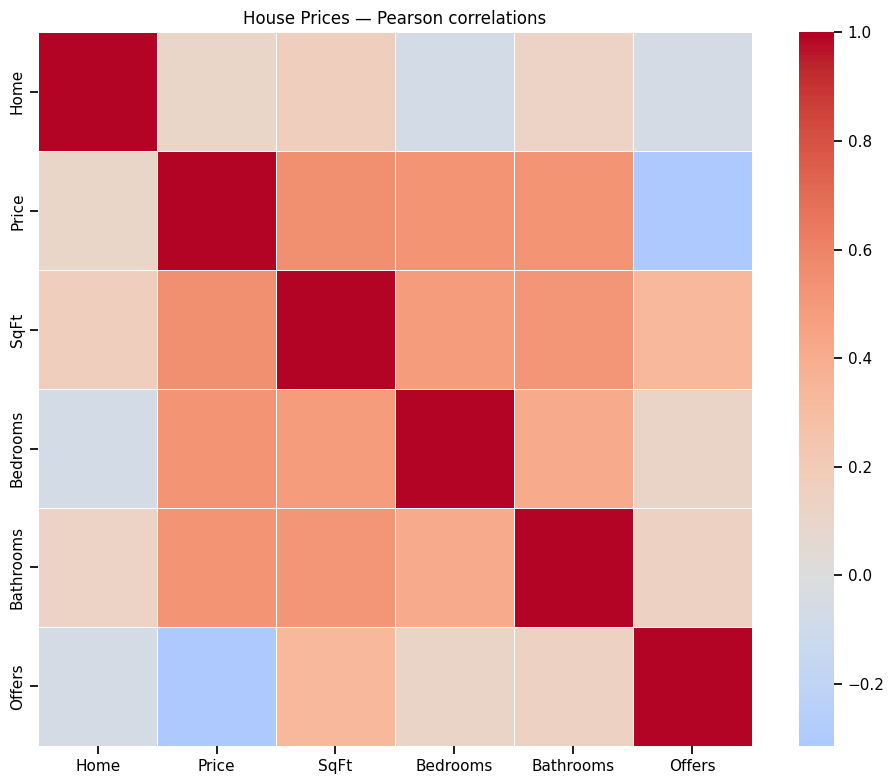

corr  abs_corr
SqFt      Price      0.552982  0.552982
Price     SqFt       0.552982  0.552982
          Bedrooms   0.525926  0.525926
Bedrooms  Price      0.525926  0.525926
Bathrooms Price      0.523258  0.523258
Price     Bathrooms  0.523258  0.523258
SqFt      Bathrooms  0.522745  0.522745
Bathrooms SqFt       0.522745  0.522745
Bedrooms  SqFt       0.483807  0.483807
SqFt      Bedrooms   0.483807  0.483807
Bedrooms  Bathrooms  0.414556  0.414556
Bathrooms Bedrooms   0.414556  0.414556

In [4]:
house = data['house_prices'].copy()
corr_house = show_corr_heatmap(house, method='pearson', title='House Prices — Pearson correlations')
display(top_abs_correlations(corr_house, k=12))


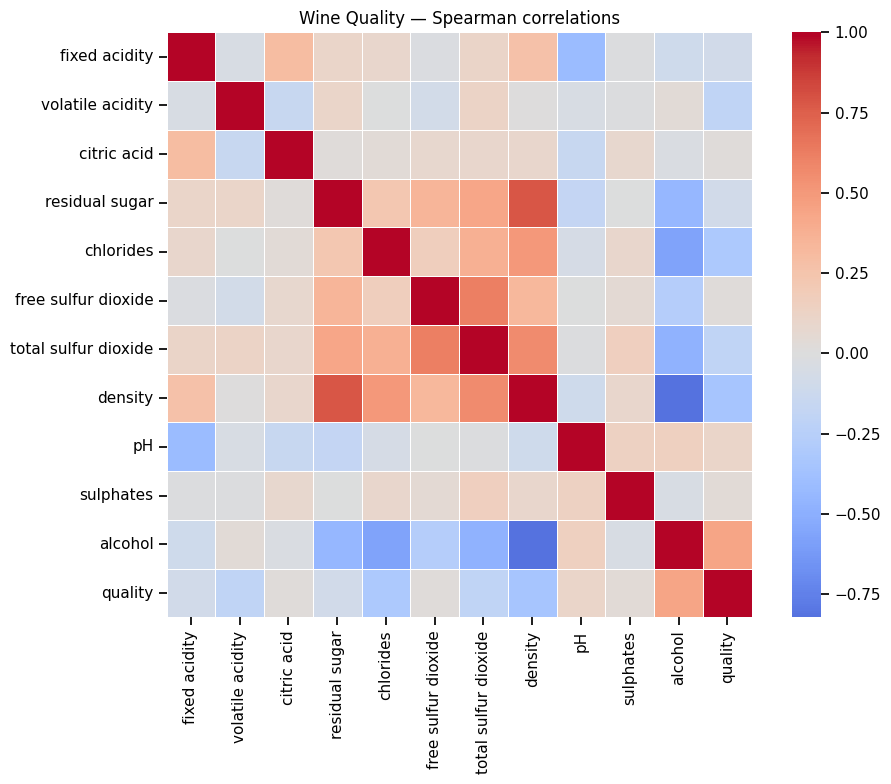

,,corr,abs_corr
density,alcohol,-0.821855,0.821855
alcohol,density,-0.821855,0.821855
density,residual sugar,0.780365,0.780365
residual sugar,density,0.780365,0.780365
total sulfur dioxide,free sulfur dioxide,0.618616,0.618616
free sulfur dioxide,total sulfur dioxide,0.618616,0.618616
chlorides,alcohol,-0.570806,0.570806
alcohol,chlorides,-0.570806,0.570806
density,total sulfur dioxide,0.563824,0.563824
total sulfur dioxide,density,0.563824,0.563824


In [5]:
wine = data['wine'].copy()
corr_wine = show_corr_heatmap(wine, method='spearman', title='Wine Quality — Spearman correlations')
display(top_abs_correlations(corr_wine, k=15))



## ۴) تفسیر درست همبستگی (و پرهیز از دام‌های رایج)

### ۴٫۱) همبستگی به معنای علیت نیست

حتی اگر $\rho$ بزرگ باشد، ممکن است ناشی از موارد زیر باشد:

- متغیر پنهان $Z$ که هم بر $X$ و هم بر $Y$ اثر می‌گذارد (confounding)،
- سوگیری انتخاب (فقط زیرمجموعهٔ سوگیر را مشاهده می‌کنید)،
- روند مشترک زمانی (همبستگی کاذب در سری‌زمانی)،
- ترکیب گروه‌ها (پارادوکس سیمپسون)،
- کوپل‌بودن اندازه‌گیری (یک متغیر از دیگری محاسبه شده است).

به زبان ML: همبستگی نشان‌دهندهٔ **ارتباط پیش‌بینانه** تحت فرآیند تولید دادهٔ فعلی است، نه اینکه تحت مداخله چه رخ می‌دهد.

### ۴٫۲) همبستگی صفر هم می‌تواند به معنای وابستگی قوی باشد

همبستگی پیرسون فقط رابطهٔ خطی را می‌سنجد. مثال $Y=X^2$ با $X$ متقارن حول صفر را در نظر بگیرید؛ همبستگی بین $X$ و $X^2$ ممکن است نزدیک صفر باشد، در حالی که $Y$ کاملاً توسط $X$ تعیین می‌شود. بنابراین نمودار پراکندگی ضروری است.

### ۴٫۳) چه مقداری «بزرگ» محسوب می‌شود؟

آستانهٔ جهان‌شمول وجود ندارد. قضاوت عملی به موارد زیر بستگی دارد:

- زمینهٔ کاربرد،
- سطح نویز،
- اندازهٔ نمونه،
- اینکه ویژگی به‌تنهایی استفاده می‌شود یا با سایر ویژگی‌ها ترکیب می‌شود،
- پایداری تحت نمونه‌گیری مجدد و در برش‌ها/زیرگروه‌ها.

یک رویکرد مقاوم ترکیبی است از:

- اندازهٔ اثر (|corr|)،
- بررسی شکل (نمودار پراکندگی)،
- بررسی پایداری (بازهٔ بوت‌استرپ)،
- سازگاری در زیرگروه‌ها.

### ۴٫۴) تبدیل فیشر (برای بازهٔ تقریبی سریع)

برای همبستگی پیرسون $r$، تبدیل نرمال‌ساز:

$$
z = \frac{1}{2}\ln\left(\frac{1+r}{1-r}\right).
$$

برای $n$ متوسط، $z$ تقریباً نرمال با خطای استاندارد $1/\sqrt{n-3}$ است.



### ۴٫۵) نمایش: وابستگی غیرخطی قوی با همبستگی پیرسون نزدیک صفر

$X \sim \mathrm{Uniform}(-1,1)$ و $Y=X^2+\epsilon$ را می‌سازیم.

- نمودار پراکندگی U-شکل واضحی نشان می‌دهد (وابستگی قوی).
- همبستگی پیرسون بین $X$ و $Y$ نزدیک صفر است.
- همبستگی اسپیرمن نیز می‌تواند کوچک باشد چون رابطه یکنوا نیست.


Pearson corr(X, Y): -0.012851601186206669
Spearman corr(X, Y): 0.02023599477155323
Kendall corr(X, Y): 0.024030242383811427


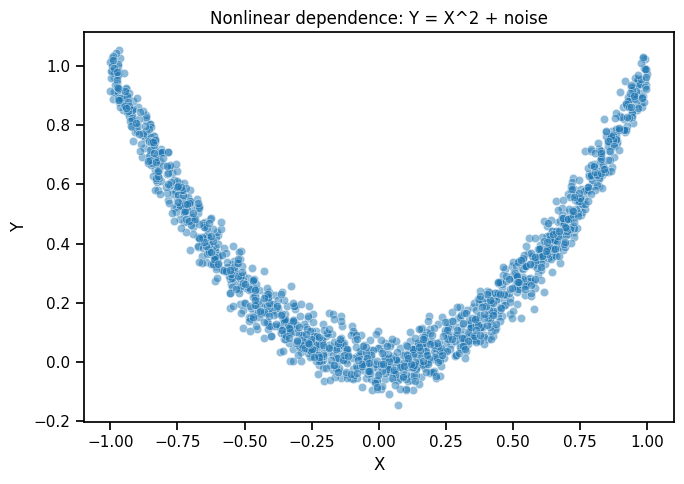

In [6]:
rng = np.random.default_rng(0)
X = rng.uniform(-1, 1, size=1500)
eps = rng.normal(0, 0.05, size=1500)
Y = X**2 + eps

print('Pearson corr(X, Y):', pd.Series(X).corr(pd.Series(Y), method='pearson'))
print('Spearman corr(X, Y):', pd.Series(X).corr(pd.Series(Y), method='spearman'))
print('Kendall corr(X, Y):', pd.Series(X).corr(pd.Series(Y), method='kendall'))

plt.figure(figsize=(7,5))
sns.scatterplot(x=X, y=Y, alpha=0.5)
plt.title('Nonlinear dependence: Y = X^2 + noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.tight_layout()
plt.show()



## ۵) نمودار پراکندگی فراتر از حالت پایه: گونه‌های عملی

داده‌های واقعی اغلب به گونه‌های مختلف نمودار نیاز دارند تا ساختار آشکار شود.

### ۵٫۱) شفافیت (alpha)

وقتی نقاط زیاد هستند، هم‌پوشانی زیاد باعث می‌شود چگالی دیده نشود. تنظیم `alpha` کمک می‌کند نواحی پرتراکم مشخص شوند.

### ۵٫۲) Hexbin (دوبعدی‌سازی با بین‌ها)

نمودار hexbin شمارش را در بین‌های شش‌ضلعی نشان می‌دهد و برای داده‌های بزرگ مفید است.

### ۵٫۳) نمودارهای joint با توزیع‌های حاشیه‌ای

هیستوگرام یا KDE حاشیه‌ای کمک می‌کند توزیع هر متغیر را کنار رابطهٔ دوتایی ببینید.

این گونه‌ها را روی diamonds (بزرگ) نشان می‌دهیم و سپس jitter را روی مثال کوچک salaries استفاده می‌کنیم.


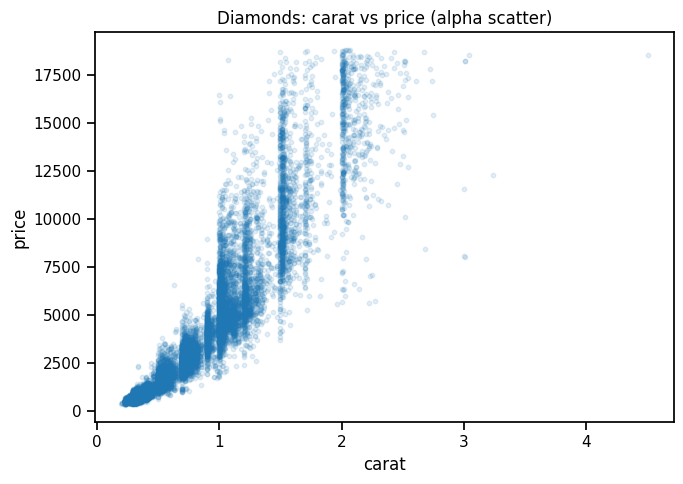

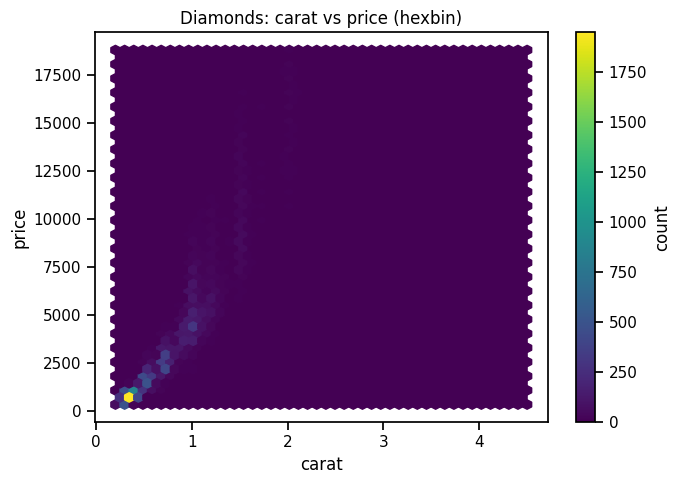

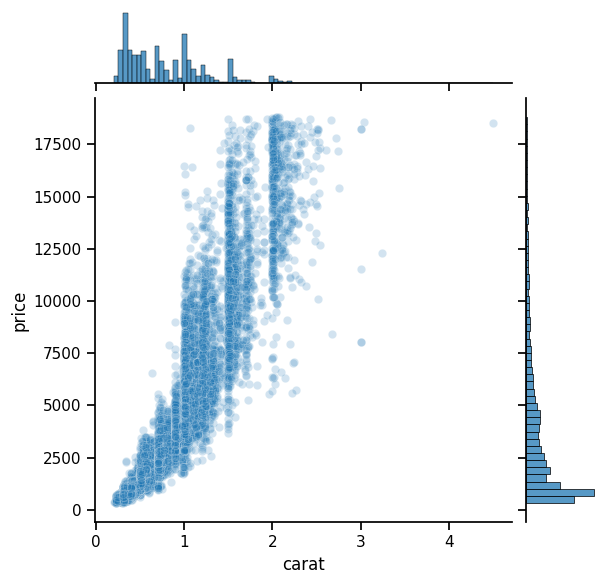

In [7]:
diamonds = data['diamonds'].copy()
diam_num = diamonds[['carat','price']].dropna()
sample = diam_num.sample(min(15000, len(diam_num)), random_state=1)

# Alpha blending scatter
plt.figure(figsize=(7,5))
plt.scatter(sample['carat'], sample['price'], alpha=0.12, s=10)
plt.title('Diamonds: carat vs price (alpha scatter)')
plt.xlabel('carat')
plt.ylabel('price')
plt.tight_layout()
plt.show()

# Hexbin
plt.figure(figsize=(7,5))
plt.hexbin(sample['carat'], sample['price'], gridsize=45)
plt.title('Diamonds: carat vs price (hexbin)')
plt.xlabel('carat')
plt.ylabel('price')
plt.colorbar(label='count')
plt.tight_layout()
plt.show()

# Joint plot with marginals
sns.jointplot(data=sample, x='carat', y='price', kind='scatter', height=6, alpha=0.2)
plt.show()



### ۵٫۴) Jitter برای محورهای گسسته/دسته‌ای

اگر $X$ دسته‌ای باشد، برای نمودار پراکندگی باید آن را به موقعیت‌های عددی نگاشت کنیم. برای تصویرسازی می‌توانید:

- دسته‌ها را به کدهای عددی نگاشت کنید،
- نویز کوچک (jitter) اضافه کنید تا هم‌پوشانی کاهش یابد،
- الگو را با آمارهای گروهی تأیید کنید.

این کار را برای دیتاست salaries (Salary بر حسب Job) انجام می‌دهیم.


,Name,Age,Job,Salary
0,Kevin Sanders,24,Software Engineer,7300
1,Lisa Mills,26,High School Teacher,6100
2,Donna Allison,27,Dentist,12700
3,Michael Schmitt,43,Dentist,17500
4,Lisa Shaffer,31,Accountant,7400


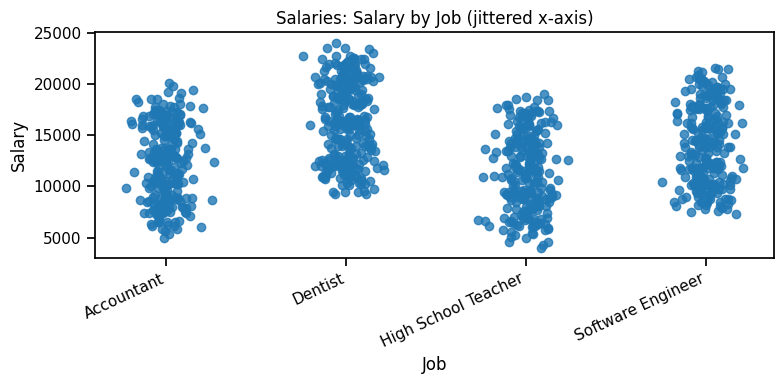

,count,mean,std,min,25%,50%,75%,max
Job,,,,,,,,
Accountant,243.0,12327.983539,3726.102761,5000.0,9000.0,12500.0,15750.0,20100.0
Dentist,267.0,16295.505618,3890.027063,9300.0,12650.0,16300.0,19700.0,24100.0
High School Teacher,242.0,11402.066116,3733.902638,4000.0,8500.0,11250.0,14300.0,19100.0
Software Engineer,248.0,14127.419355,3850.281839,7300.0,10700.0,14000.0,17600.0,21600.0


In [8]:
salaries = data['salaries'].copy()
display(salaries.head())

salaries['JobCode'] = salaries['Job'].astype('category').cat.codes
rng = np.random.default_rng(3)
salaries['JobCode_jitter'] = salaries['JobCode'] + rng.normal(0, 0.08, size=len(salaries))

plt.figure(figsize=(8,4))
plt.scatter(salaries['JobCode_jitter'], salaries['Salary'], alpha=0.8)
plt.xticks(ticks=range(salaries['JobCode'].nunique()), labels=salaries['Job'].astype('category').cat.categories, rotation=25, ha='right')
plt.title('Salaries: Salary by Job (jittered x-axis)' if True else '')
plt.xlabel('Job')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

display(salaries.groupby('Job')['Salary'].describe())



## ۶) یک روال قابل تکرار برای نمودار پراکندگی (با مثال‌ها)

برای یک زوج $(X,Y)$، یک روال عملی:

۱) نمودار پایه (برای داده‌های متراکم از alpha یا hexbin).  
۲) مقایسهٔ Pearson و Spearman.  
۳) در صورت خمیدگی، تبدیل‌ها (log، sqrt، توان) را در نظر بگیرید.  
۴) بررسی باقی‌مانده‌ها پس از برازش خط ساده برای تشخیص خمیدگی و ناهمسانی واریانس.  
۵) بررسی حساسیت نسبت به پرت‌ها (فیلتر مقاوم).  
۶) اگر مخدوش‌سازی یا برهم‌کنش محتمل است، بر اساس دسته‌ها برش بزنید.

این روال را روی موارد زیر اجرا می‌کنیم:

- قیمت خانه: SqFt در برابر Price
- قد/وزن: Height در برابر Weight
- شناختی: mom_iq در برابر kid_score (و برش بر اساس mom_hs)


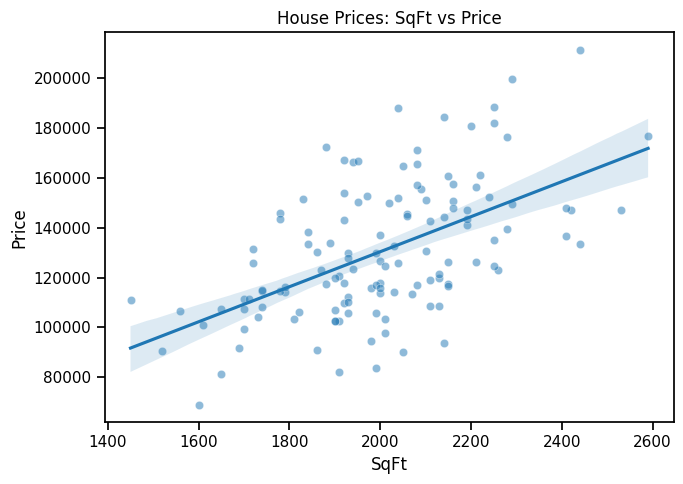

Pearson: 0.5529822425554837
Spearman: 0.5546133629830046
Kendall: 0.3841470703276054


In [9]:
scatter_with_fit(house, 'SqFt', 'Price', title='House Prices: SqFt vs Price')

print('Pearson:', house[['SqFt','Price']].corr(method='pearson').iloc[0,1])
print('Spearman:', house[['SqFt','Price']].corr(method='spearman').iloc[0,1])
print('Kendall:', house[['SqFt','Price']].corr(method='kendall').iloc[0,1])



### ۶٫۱) نمای باقی‌مانده‌ها و ایدهٔ تبدیل لگاریتمی (قیمت خانه)

باقی‌مانده‌ها پس از برازش خطی:

$$
e_i = y_i - (\hat{\beta}_0 + \hat{\beta}_1 x_i).
$$

الگوهای $e_i$ در برابر $x_i$ می‌تواند نشان دهد:

- خمیدگی سیستماتیک (غیرخطی بودن)،
- تغییر پراکندگی (ناهمسانی واریانس).

یک بررسی اکتشافی رایج، مقایسهٔ مقیاس خام با log($Y$) است.


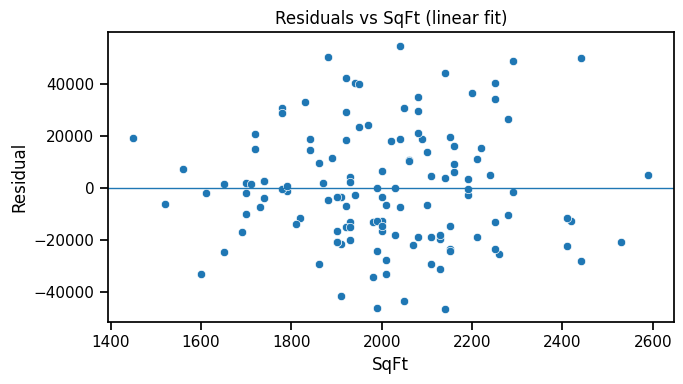

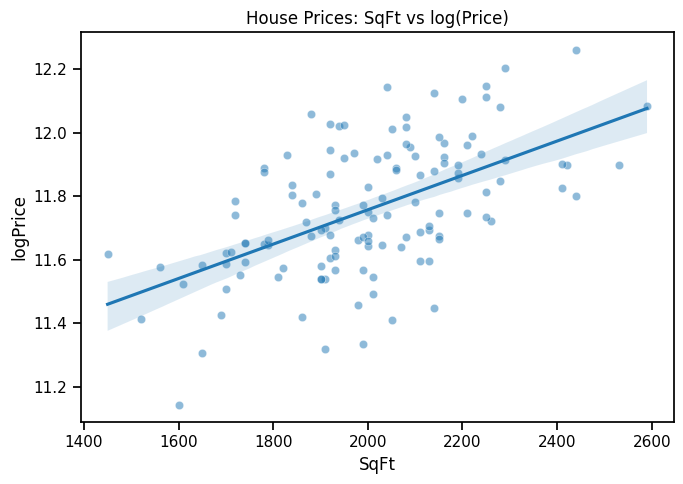

,SqFt,logPrice
0,1790,11.646582
1,2030,11.645707
2,1740,11.650947
3,1980,11.458469
4,2130,11.693579
...,...,...
123,1900,11.692744
124,2160,11.904292
125,2070,11.639558
126,2020,11.917724


In [10]:
import numpy.linalg as la
x = house['SqFt'].to_numpy(dtype=float)
y = house['Price'].to_numpy(dtype=float)
Xmat = np.c_[np.ones_like(x), x]
beta = la.lstsq(Xmat, y, rcond=None)[0]
y_hat = Xmat @ beta
resid = y - y_hat

plt.figure(figsize=(7,4))
sns.scatterplot(x=x, y=resid)
plt.axhline(0, linewidth=1)
plt.title('Residuals vs SqFt (linear fit)')
plt.xlabel('SqFt')
plt.ylabel('Residual')
plt.tight_layout()
plt.show()

house2 = house.copy()
house2['logPrice'] = np.log(house2['Price'])
scatter_with_fit(house2, 'SqFt', 'logPrice', title='House Prices: SqFt vs log(Price)')



### ۶٫۲) مثال: قد در برابر وزن (رابطهٔ تقریباً خطی)

اگر متغیرها استاندارد شوند (z-score)، شیب رگرسیون با همبستگی برابر می‌شود:

$$
\beta_1^{(z)} = r.
$$

مراحل:

۱) رسم Height در برابر Weight  
۲) محاسبهٔ همبستگی‌ها  
۳) برازش خط ساده  
۴) محاسبهٔ شیب استاندارد


,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


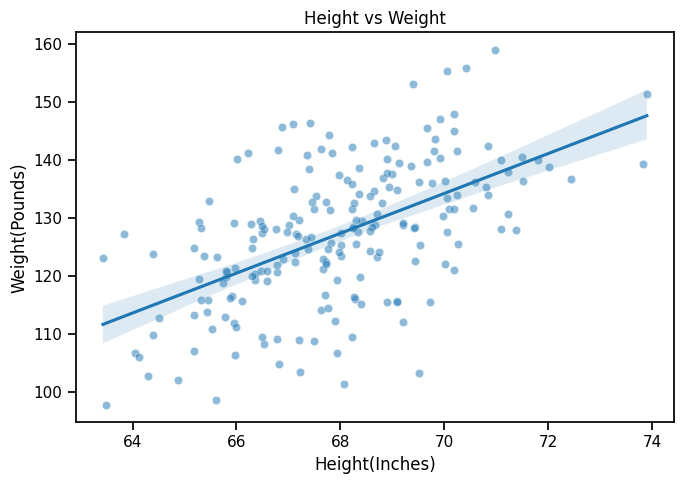

Pearson: 0.5568647346123003
Spearman: 0.5507608131620684
Standardized slope: 0.5568647346122994


In [11]:
hw = data['hw_200'].copy()
hw.columns = [c.strip().strip('"') for c in hw.columns]
hw = hw.rename(columns={c: c.replace(' ', '') for c in hw.columns})
display(hw.head())

xcol = [c for c in hw.columns if 'Height' in c][0]
ycol = [c for c in hw.columns if 'Weight' in c][0]

scatter_with_fit(hw, xcol, ycol, title='Height vs Weight')

r_p = hw[[xcol, ycol]].corr(method='pearson').iloc[0,1]
r_s = hw[[xcol, ycol]].corr(method='spearman').iloc[0,1]
print('Pearson:' if True else '', r_p)
print('Spearman:' if True else '', r_s)

xz = (hw[xcol] - hw[xcol].mean()) / hw[xcol].std(ddof=1)
yz = (hw[ycol] - hw[ycol].mean()) / hw[ycol].std(ddof=1)
Xz = np.c_[np.ones(len(xz)), xz.to_numpy()]
bz = np.linalg.lstsq(Xz, yz.to_numpy(), rcond=None)[0]
print('Standardized slope:', bz[1])



### ۶٫۳) مثال: دیتاست شناختی — mom_iq در برابر kid_score (با برش زیرگروهی)

متغیر دسته‌ای (`mom_hs`) را برای برش اضافه می‌کنیم تا ببینیم ارتباط در گروه‌ها متفاوت است یا نه.


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,yes,121.117529,yes,27
1,98,yes,89.361882,yes,25
2,85,yes,115.443165,yes,27
3,83,yes,99.449639,yes,25
4,115,yes,92.745710,yes,27


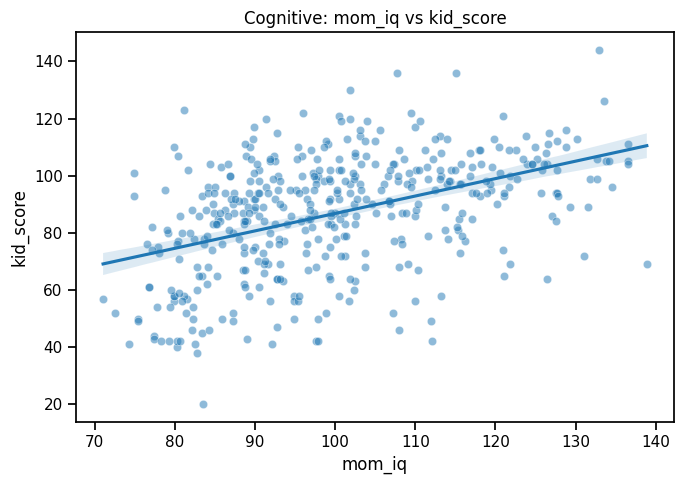

Pearson: 0.44827584227897366
Spearman: 0.4612033857889969


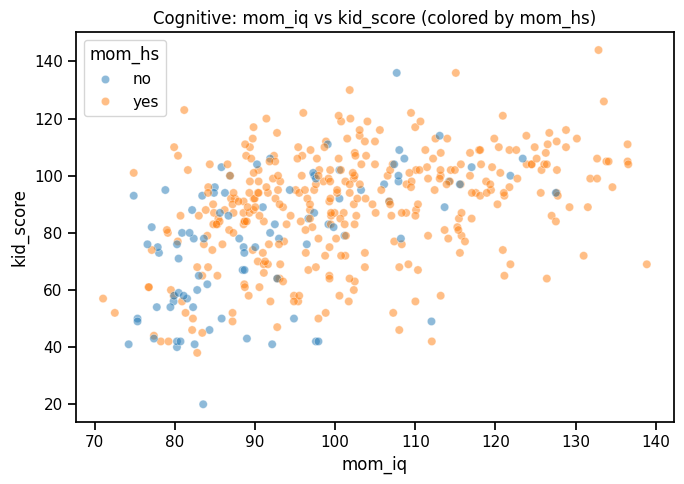

,Pearson corr within group
no,0.542113
yes,0.377740


In [12]:
cog = data['cognitive'].copy()
display(cog.head())

scatter_with_fit(cog, 'mom_iq', 'kid_score', title='Cognitive: mom_iq vs kid_score', sample=20000)
print('Pearson:', cog[['mom_iq','kid_score']].corr(method='pearson').iloc[0,1])
print('Spearman:', cog[['mom_iq','kid_score']].corr(method='spearman').iloc[0,1])

sub = cog[['mom_iq','kid_score','mom_hs']].dropna().sample(min(6000, len(cog)), random_state=9)
plt.figure(figsize=(7,5))
sns.scatterplot(data=sub, x='mom_iq', y='kid_score', hue='mom_hs', alpha=0.5)
plt.title('Cognitive: mom_iq vs kid_score (colored by mom_hs)')
plt.tight_layout()
plt.show()

by = groupwise_corr(sub, 'mom_hs', 'mom_iq', 'kid_score', method='pearson')
display(by.to_frame('Pearson corr within group'))



## ۷) ماتریس پراکندگی و Pair Plot (نمای چندمتغیرهٔ دوتایی)

Pair plot یک اسکن بصری سریع از روابط دوتایی فراهم می‌کند. در داده‌های نظارت‌شده، استفاده از `hue=` نشان می‌دهد کلاس‌ها در کدام زوج‌ویژگی بهتر جدا می‌شوند.

از دیتاست آیریس به‌عنوان مثال چندکلاسه استفاده می‌کنیم.


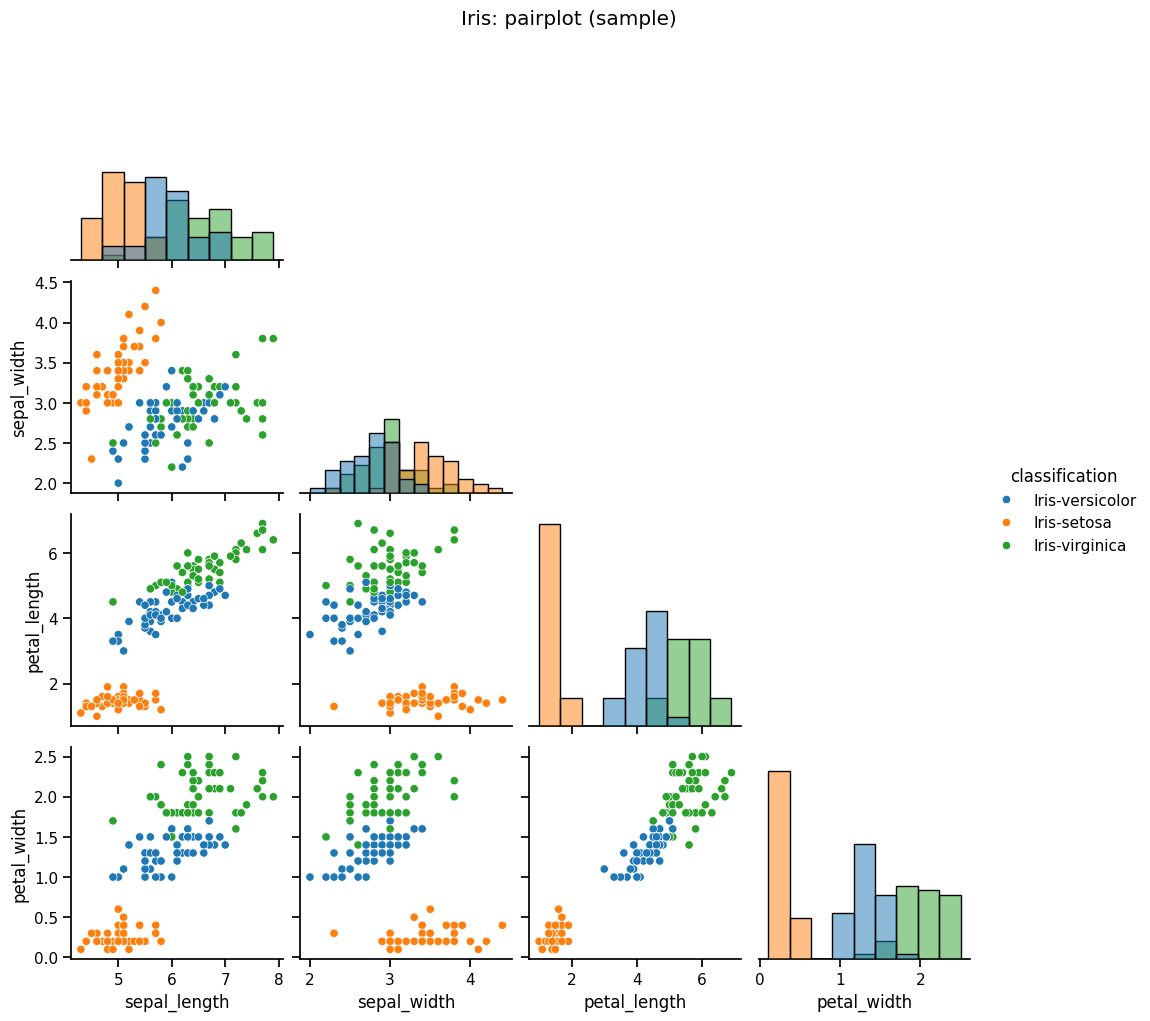

In [13]:
iris = data['iris'].copy()
num_cols = [c for c in iris.columns if c != 'classification' and pd.api.types.is_numeric_dtype(iris[c])]
sample_iris = iris.sample(min(200, len(iris)), random_state=42)
sns.pairplot(sample_iris, vars=num_cols, hue='classification', corner=True, diag_kind='hist')
plt.suptitle('Iris: pairplot (sample)', y=1.02)
plt.show()



## ۸) انواع ترکیبی: فراتر از همبستگی عددی↔عدد

### ۸٫۱) عددی ↔ دودویی: point-biserial

اگر $Y$ دودویی (۰/۱) و $X$ عددی باشد، point-biserial در عمل همان همبستگی پیرسون بین $X$ و $Y$ است. این را روی دیتاست دیابت اجرا می‌کنیم و با نمودار ویولن (توزیع در هر کلاس) اعتبارسنجی می‌کنیم.


,corr_with_label
Glucose,0.466581
BMI,0.292695
Age,0.238356
Pregnancies,0.221898
DiabetesPedigreeFunction,0.173844
Insulin,0.130548
SkinThickness,0.074752
BloodPressure,0.065068


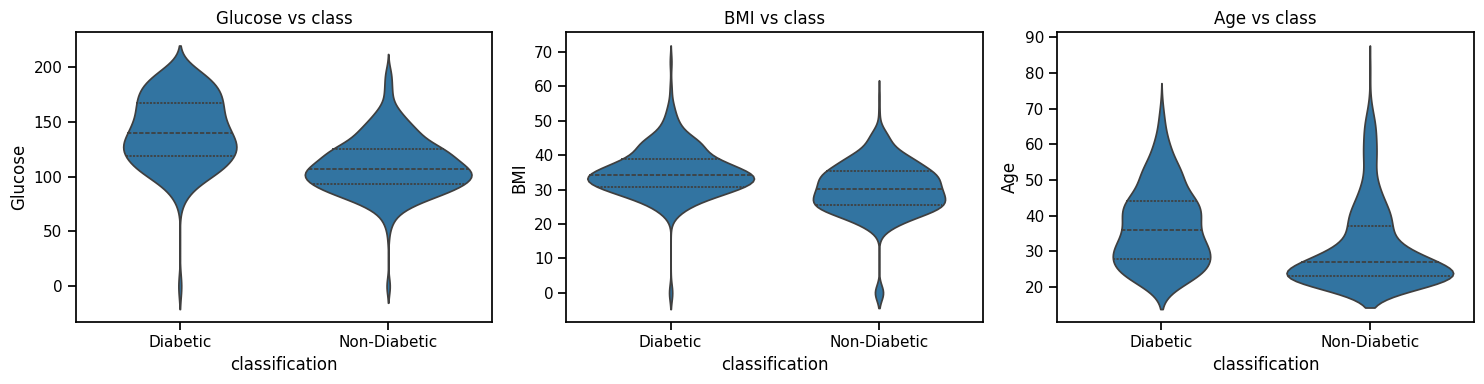

In [14]:
diab = data['diabetes'].copy()
label_map = {'Diabetic': 1, 'Non-Diabetic': 0}
diab['y'] = diab['classification'].map(label_map)
num_cols = [c for c in diab.columns if c not in ['classification','y'] and pd.api.types.is_numeric_dtype(diab[c])]
corrs = diab[num_cols + ['y']].corr()['y'].drop('y').sort_values(key=lambda s: s.abs(), ascending=False)
display(corrs.to_frame('corr_with_label'))

top3 = corrs.index[:3].tolist()
fig, axes = plt.subplots(1, 3, figsize=(15,4))
for ax, c in zip(axes, top3):
    sns.violinplot(data=diab, x='classification', y=c, ax=ax, inner='quartile')
    ax.set_title(f'{c} vs class')
plt.tight_layout()
plt.show()



### ۸٫۲) دسته‌ای (چندکلاسه) ↔ عددی: نسبت همبستگی $\eta^2$

برای متغیر دسته‌ای $G$ با گروه‌های $g$ و متغیر عددی $X$، اندازه‌اثر:

$$
\eta^2 = \frac{\sum_g n_g(\bar{x}_g - \bar{x})^2}{\sum_i (x_i - \bar{x})^2}.
$$

تفسیر: سهم واریانس $X$ که توسط عضویت در گروه توضیح داده می‌شود.

این را با ستاره‌ها نشان می‌دهیم: Temperature توضیح‌داده‌شده توسط Spectral_Class.


eta^2(Temperature ~ Spectral_Class) = 0.7097704447020484


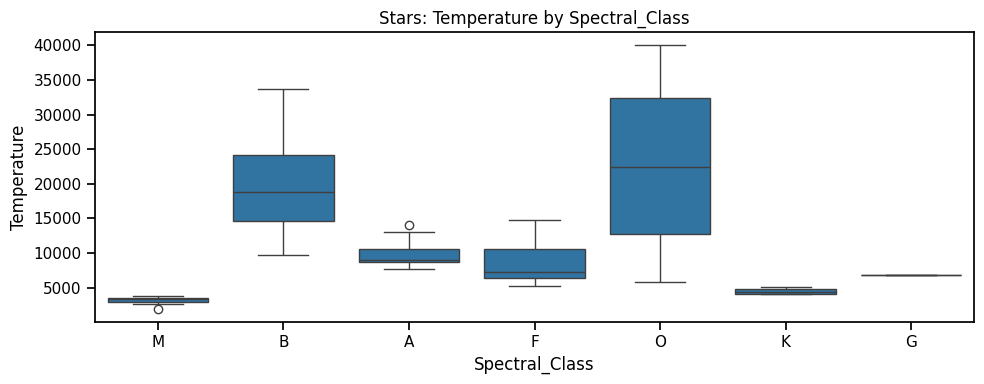

In [15]:
stars = data['stars'].copy()
def eta_squared(x: pd.Series, g: pd.Series) -> float:
    df = pd.DataFrame({'x': x, 'g': g}).dropna()
    x = df['x']
    overall_mean = x.mean()
    ss_between = df.groupby('g')['x'].apply(lambda s: len(s) * (s.mean() - overall_mean) ** 2).sum()
    ss_total = ((x - overall_mean) ** 2).sum()
    return float(ss_between / ss_total) if ss_total > 0 else np.nan

eta = eta_squared(stars['Temperature'], stars['Spectral_Class'])
print('eta^2(Temperature ~ Spectral_Class) =', eta)

plt.figure(figsize=(10,4))
sns.boxplot(data=stars, x='Spectral_Class', y='Temperature')
plt.title('Stars: Temperature by Spectral_Class')
plt.tight_layout()
plt.show()



### ۸٫۳) دسته‌ای ↔ دسته‌ای: $V$ کرامر

برای دو متغیر دسته‌ای $A$ و $B$، معیار $V$ کرامر با استفاده از $\chi^2$ تعریف می‌شود:

$$
V = \sqrt{\frac{\chi^2 / n}{\min(k-1,\;r-1)}},
$$

که در آن $r$ و $k$ تعداد دسته‌ها هستند. این را روی الماس‌ها نشان می‌دهیم: cut در برابر color.


Cramér's V(cut, color) = 0.037924332663570634


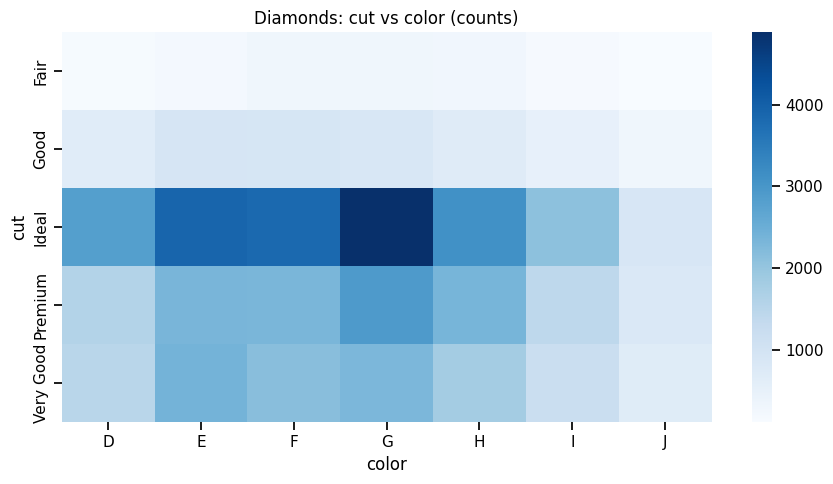

In [16]:
from scipy.stats import chi2_contingency
d_cat = data['diamonds'][['cut','color']].dropna().copy()
ct = pd.crosstab(d_cat['cut'], d_cat['color'])
chi2, p, dof, expected = chi2_contingency(ct)
n = ct.values.sum()
r, k = ct.shape
cramers_v = np.sqrt((chi2 / n) / (min(k - 1, r - 1)))
print("Cramér's V(cut, color) =", cramers_v)

plt.figure(figsize=(9,5))
sns.heatmap(ct, cmap='Blues')
plt.title('Diamonds: cut vs color (counts)')
plt.tight_layout()
plt.show()



### ۸٫۴) اطلاعات متقابل (MI) به‌عنوان ابزار غربال غیرخطی

اطلاعات متقابل:

$$
I(X;Y) = \mathbb{E}\left[\log\frac{p(X,Y)}{p(X)p(Y)}\right].
$$

MI می‌تواند وابستگی غیرخطی را نیز تشخیص دهد. MI بین ویژگی‌های دیابت و برچسب دودویی را با scikit-learn تخمین می‌زنیم.


In [17]:
from sklearn.feature_selection import mutual_info_classif
Xmi = diab[num_cols].fillna(diab[num_cols].median())
ymi = diab['y']
mi = mutual_info_classif(Xmi, ymi, random_state=0)
mi_s = pd.Series(mi, index=num_cols).sort_values(ascending=False)
display(mi_s.to_frame('mutual_information'))


,mutual_information
Glucose,0.126805
BMI,0.071820
Age,0.046833
Insulin,0.035542
Pregnancies,0.033064
DiabetesPedigreeFunction,0.010656
BloodPressure,0.003267
SkinThickness,0.000000



## ۹) عدم‌قطعیت: بازهٔ اطمینان بوت‌استرپ برای همبستگی

دستور بوت‌استرپ:

۱) نمونه‌گیری از ردیف‌ها با جایگذاری  
۲) محاسبهٔ همبستگی روی نمونهٔ جدید  
۳) تکرار $B$ بار  
۴) استفاده از صدک‌ها به‌عنوان بازهٔ اطمینان

محاسبه می‌کنیم:

- خانه: Pearson corr(SqFt, Price)
- الماس: Spearman corr(carat, price)


House Pearson corr: 0.5529822425554839
95% bootstrap CI: [0.44265826 0.6508531 ]


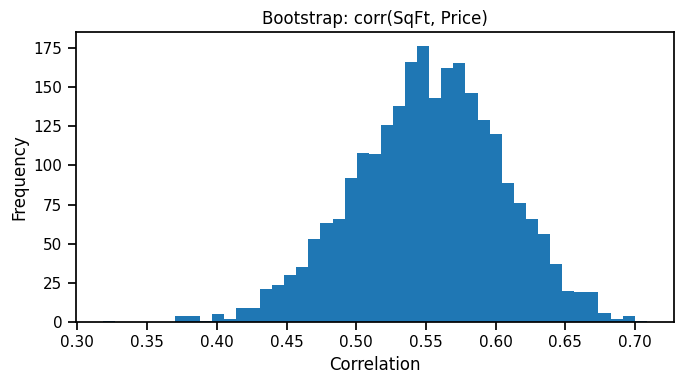

Diamonds Spearman corr: 0.9634311547065777
95% bootstrap CI: [0.96218261 0.96466623]


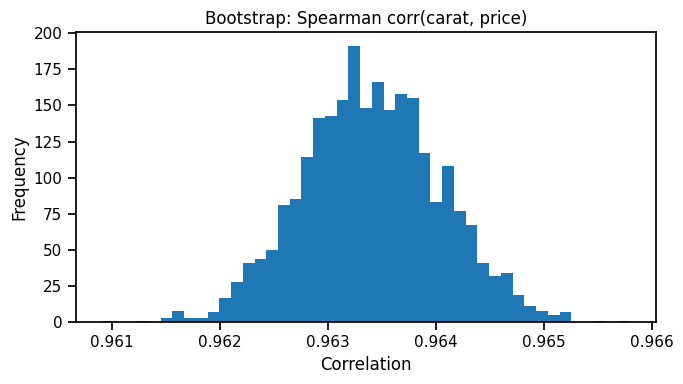

In [18]:
def bootstrap_corr(x: np.ndarray, y: np.ndarray, method='pearson', B=2500, seed=42):
    rng = np.random.default_rng(seed)
    n = len(x)
    stats = np.empty(B)
    for b in range(B):
        idx = rng.integers(0, n, size=n)
        xb = x[idx]
        yb = y[idx]
        stats[b] = pd.Series(xb).corr(pd.Series(yb), method=method)
    return stats

x = house['SqFt'].to_numpy(dtype=float)
y = house['Price'].to_numpy(dtype=float)
boot = bootstrap_corr(x, y, method='pearson', B=2500, seed=1)
ci = np.quantile(boot, [0.025, 0.975])
print('House Pearson corr:', pd.Series(x).corr(pd.Series(y)))
print('95% bootstrap CI:', ci)

plt.figure(figsize=(7,4))
plt.hist(boot, bins=45)
plt.title('Bootstrap: corr(SqFt, Price)')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

dd = diam_num.sample(min(12000, len(diam_num)), random_state=0)
x2 = dd['carat'].to_numpy(dtype=float)
y2 = dd['price'].to_numpy(dtype=float)
boot2 = bootstrap_corr(x2, y2, method='spearman', B=2500, seed=2)
ci2 = np.quantile(boot2, [0.025, 0.975])
print('Diamonds Spearman corr:', pd.Series(x2).corr(pd.Series(y2), method='spearman'))
print('95% bootstrap CI:', ci2)

plt.figure(figsize=(7,4))
plt.hist(boot2, bins=45)
plt.title('Bootstrap: Spearman corr(carat, price)')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



## ۱۰) مخدوش‌سازی و همبستگی جزئی (EDA عملی)

اگر $X$ و $Y$ هر دو به $Z$ وابسته باشند، همبستگی حاشیه‌ای می‌تواند گمراه‌کننده باشد.

یک بررسی عملی، همبستگی جزئی با حذف اثر $Z$ است:

۱) رگرس $X$ بر $Z$ و گرفتن باقی‌مانده‌ها $r_X$  
۲) رگرس $Y$ بر $Z$ و گرفتن باقی‌مانده‌ها $r_Y$  
۳) Corr($r_X$, $r_Y$) را محاسبه کنید

این را روی الماس‌ها اجرا می‌کنیم: price در برابر x با کنترل carat.


In [19]:
def partial_corr(df: pd.DataFrame, x: str, y: str, z: str) -> float:
    d = df[[x, y, z]].dropna()
    Z = np.c_[np.ones(len(d)), d[z].to_numpy(dtype=float)]
    bx = np.linalg.lstsq(Z, d[x].to_numpy(dtype=float), rcond=None)[0]
    by = np.linalg.lstsq(Z, d[y].to_numpy(dtype=float), rcond=None)[0]
    rx = d[x].to_numpy(dtype=float) - Z @ bx
    ry = d[y].to_numpy(dtype=float) - Z @ by
    return float(pd.Series(rx).corr(pd.Series(ry)))

diam3 = diamonds[['price','carat','x','y','z']].dropna().sample(min(25000, len(diamonds)), random_state=123)
print('Corr(price, x):', diam3[['price','x']].corr().iloc[0,1])
print('Partial Corr(price, x | carat):', partial_corr(diam3, 'price', 'x', 'carat'))


Corr(price, x): 0.885428250360261
Partial Corr(price, x | carat): -0.14429361853002626



## ۱۱) پارادوکس سیمپسون: چرا نمودار زیرگروه‌ها مهم است؟

پارادوکس سیمپسون زمانی رخ می‌دهد که ارتباط در دادهٔ تجمیع‌شده با ارتباط در زیرگروه‌ها متفاوت باشد.

روال عملی:

۱) ارتباط کلی را محاسبه کنید  
۲) یک متغیر گروه‌بندی منطقی انتخاب کنید  
۳) ارتباط را در هر گروه محاسبه کنید  
۴) نمودار را با رنگ‌بندی گروه‌ها رسم کنید و شیب‌ها را مقایسه کنید

این را روی الماس‌ها و گروه‌بندی بر اساس cut نشان می‌دهیم.


Overall Spearman corr(carat, price): 0.9625621816824832


,spearman_corr
Very Good,0.969483
Good,0.960883
Premium,0.960510
Ideal,0.953750
Fair,0.890720


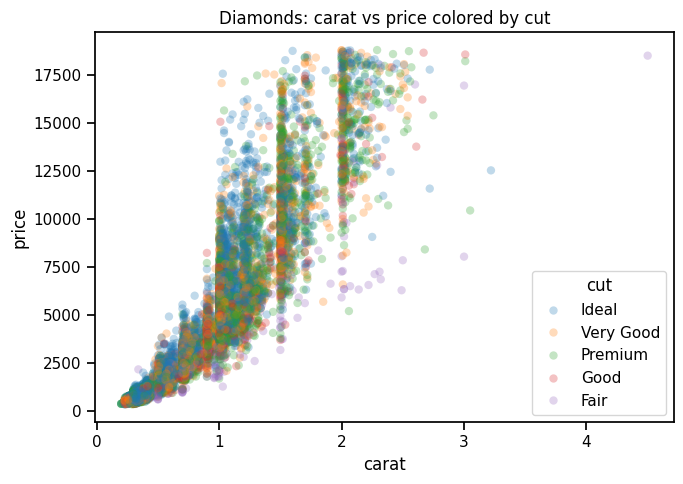

In [20]:
d2 = diamonds[['carat','price','cut']].dropna().copy()
d2s = d2.sample(min(14000, len(d2)), random_state=4)
overall = d2s[['carat','price']].corr(method='spearman').iloc[0,1]
print('Overall Spearman corr(carat, price):', overall)
group_corr = groupwise_corr(d2s, 'cut', 'carat', 'price', method='spearman')
display(group_corr.to_frame('spearman_corr'))

plt.figure(figsize=(7,5))
sns.scatterplot(data=d2s, x='carat', y='price', hue='cut', alpha=0.28, linewidth=0)
plt.title('Diamonds: carat vs price colored by cut')
plt.tight_layout()
plt.show()



## ۱۲) نقاط پرت و نفوذ بالا: تحلیل حساسیت همبستگی

همبستگی پیرسون نسبت به نقاط افراطی حساس است. یک تشخیص مقاوم، z-score بر پایهٔ میانه/MAD است:

- میانه: $\mathrm{med}(x)$
- MAD: $\mathrm{med}(|x-\mathrm{med}(x)|)$

تقریب z-score مقاوم:

$$
z_i \approx \frac{x_i-\mathrm{med}(x)}{1.4826\cdot \mathrm{MAD}(x)}.
$$

الماس‌ها را با z-score مقاوم فیلتر می‌کنیم و همبستگی‌ها را مقایسه می‌کنیم.


Pearson all: 0.9215913011934687
Pearson filtered (|robust z|<5): 0.9189819284453488
Rows all: 53940 Rows filtered: 52191


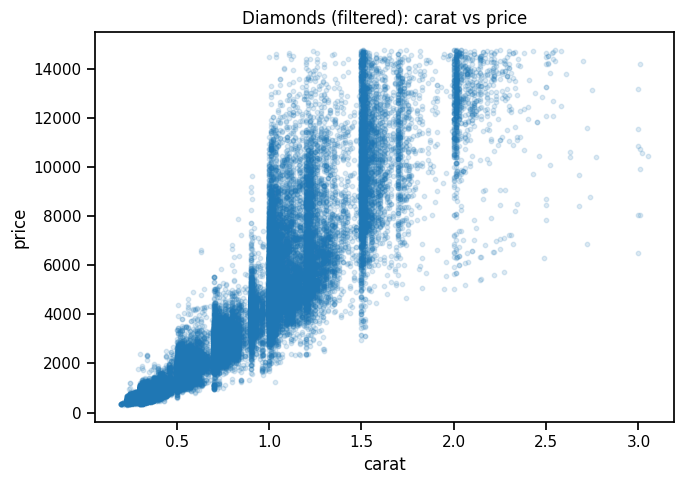

In [21]:
def robust_zscore(s: pd.Series) -> pd.Series:
    x = s.to_numpy(dtype=float)
    med = np.nanmedian(x)
    mad = np.nanmedian(np.abs(x - med))
    if mad == 0:
        return pd.Series(np.zeros_like(x), index=s.index)
    return pd.Series((x - med) / (1.4826 * mad), index=s.index)

tmp = diam_num[['carat','price']].copy()
tmp['z_price'] = robust_zscore(tmp['price'])
tmp['z_carat'] = robust_zscore(tmp['carat'])
r_all = tmp[['carat','price']].corr(method='pearson').iloc[0,1]
tmp_f = tmp[(tmp['z_price'].abs() < 5) & (tmp['z_carat'].abs() < 5)].copy()
r_f = tmp_f[['carat','price']].corr(method='pearson').iloc[0,1]
print('Pearson all:', r_all)
print('Pearson filtered (|robust z|<5):', r_f)
print('Rows all:', len(tmp), 'Rows filtered:', len(tmp_f))

plt.figure(figsize=(7,5))
plt.scatter(tmp_f['carat'], tmp_f['price'], alpha=0.15, s=10)
plt.title('Diamonds (filtered): carat vs price')
plt.xlabel('carat')
plt.ylabel('price')
plt.tight_layout()
plt.show()



## ۱۳) خودکارسازی بررسی‌های دوتایی: یک «گزارش دوتایی» کوچک

EDA وقتی خودکار شود مقیاس‌پذیرتر است. گزارش زیر:

- همبستگی عددی (Pearson یا Spearman) را محاسبه می‌کند،
- قوی‌ترین همبستگی‌های قدرمطلق را فهرست می‌کند،
- برای زوج‌های برتر نمودار پراکندگی + خط برازش را رسم می‌کند.

این گزارش را روی wine و house اجرا می‌کنیم.


,,corr,abs_corr
density,alcohol,-0.821855,0.821855
alcohol,density,-0.821855,0.821855
density,residual sugar,0.780365,0.780365
residual sugar,density,0.780365,0.780365
total sulfur dioxide,free sulfur dioxide,0.618616,0.618616
free sulfur dioxide,total sulfur dioxide,0.618616,0.618616
chlorides,alcohol,-0.570806,0.570806


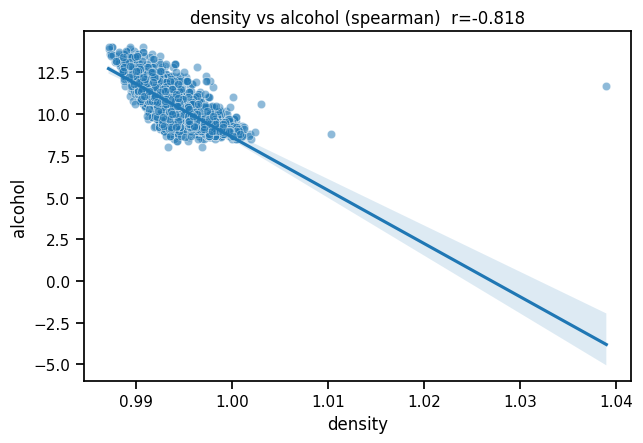

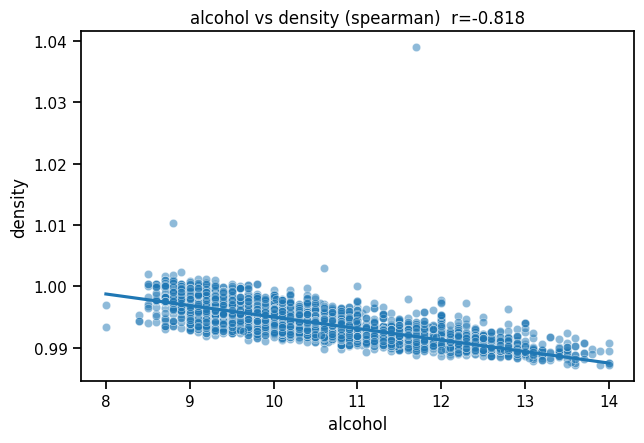

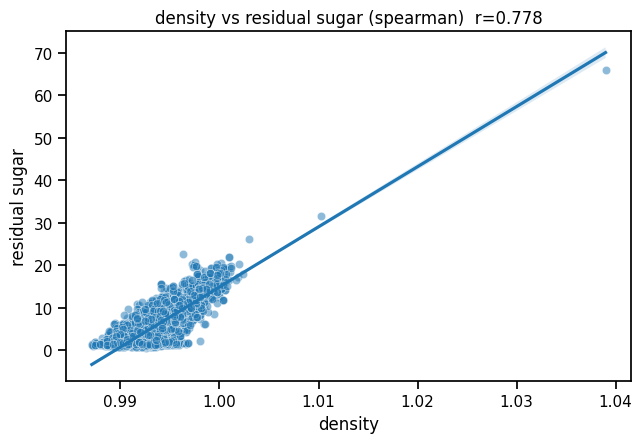

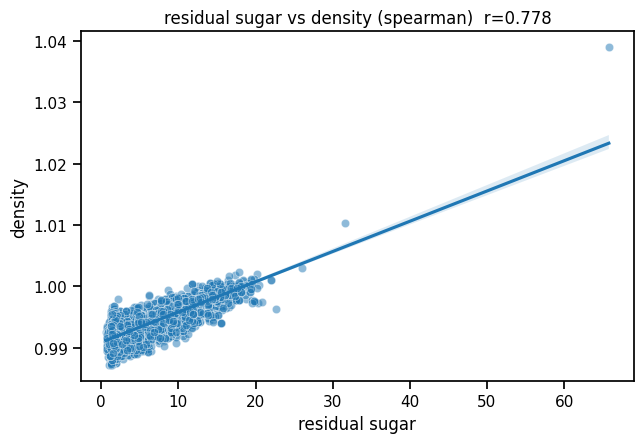

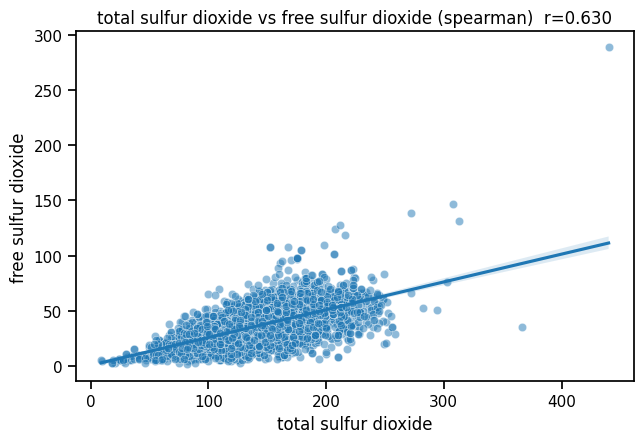

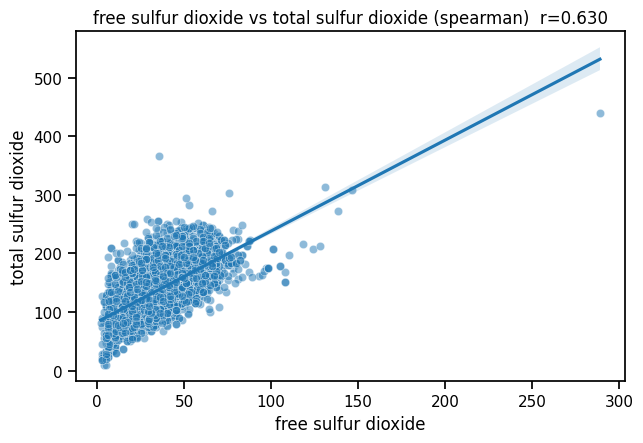

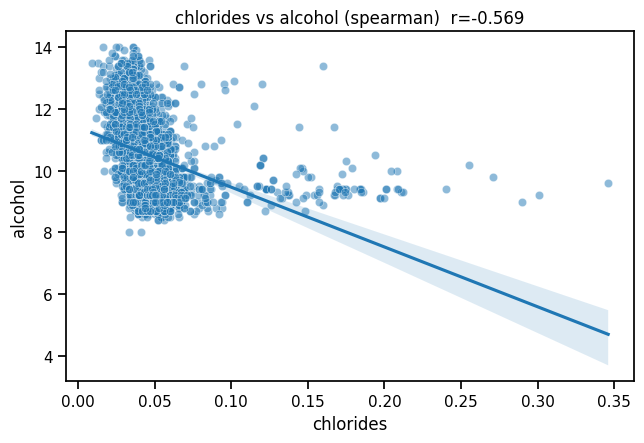

corr  abs_corr
SqFt      Price      0.552982  0.552982
Price     SqFt       0.552982  0.552982
          Bedrooms   0.525926  0.525926
Bedrooms  Price      0.525926  0.525926
Bathrooms Price      0.523258  0.523258
Price     Bathrooms  0.523258  0.523258

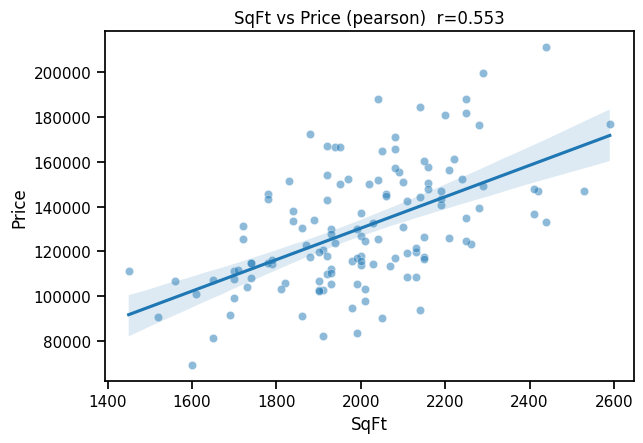

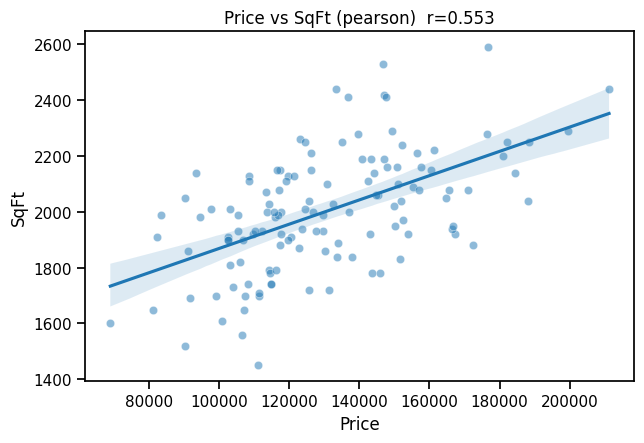

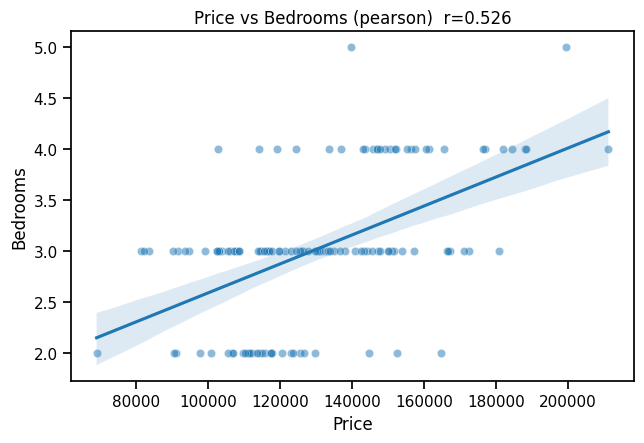

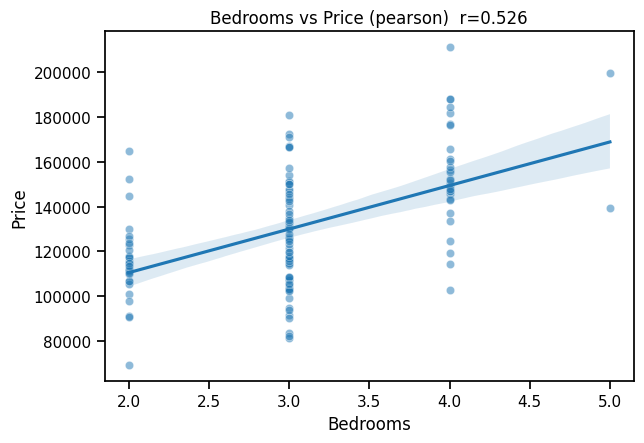

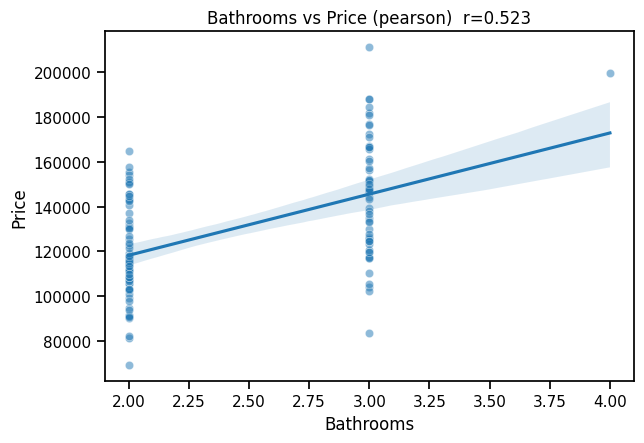

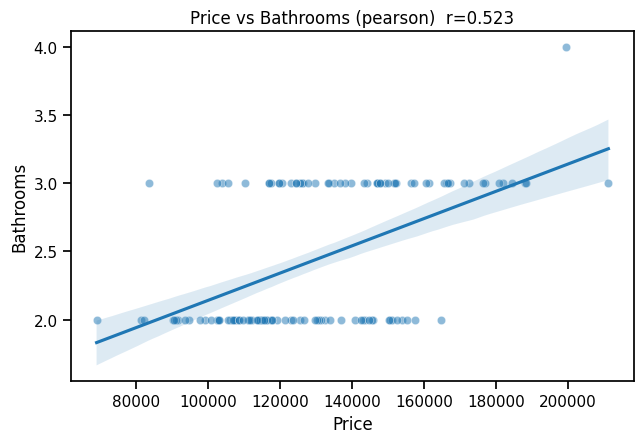

In [22]:
def pairwise_report(df: pd.DataFrame, *, method='pearson', top_k=8, sample_scatter=4000, random_state=0):
    df = coerce_numeric(df)
    num = numeric_columns(df)
    if len(num) < 2:
        print('Not enough numeric columns for pairwise report.')
        return
    corr = df[num].corr(method=method)
    top = top_abs_correlations(corr, k=top_k)
    display(top)
    for (a, b), row in top.iterrows():
        sub = df[[a, b]].dropna()
        if len(sub) > sample_scatter:
            sub = sub.sample(sample_scatter, random_state=random_state)
        r = pd.Series(sub[a]).corr(pd.Series(sub[b]), method=method)
        plt.figure(figsize=(6.6, 4.6))
        sns.scatterplot(data=sub, x=a, y=b, alpha=0.5)
        sns.regplot(data=sub, x=a, y=b, scatter=False)
        plt.title(f'{a} vs {b} ({method})  r={r:.3f}')
        plt.tight_layout()
        plt.show()

pairwise_report(wine, method='spearman', top_k=7)
pairwise_report(house, method='pearson', top_k=6)



## ۱۴) چک‌لیست EDA دوتایی (آماده برای مدل)

### A) تشخیص نوع متغیرها
- عددی (پیوسته، شمارشی، امتیازهای محدود)
- دسته‌ای (اسمی/ترتیبی)
- تاریخ/زمان (نیازمند پارس و مراقبت ویژه)
- متغیر هدف (اگر مسئله نظارت‌شده است)

### B) عددی ↔ عددی
- ماتریس همبستگی: Pearson + Spearman
- زوج‌های برتر: نمودار پراکندگی
- بررسی کنید:
  - خمیدگی → تبدیل/مدل غیرخطی،
  - ناهمسانی واریانس → تبدیل/زیان مقاوم،
  - پرت/نفوذ بالا → بررسی‌های مقاوم،
  - شبه‌تکراری‌ها → حذف/دِدوپ،
  - خوشه‌ها → برهم‌کنش یا سگمنت‌بندی.

### C) عددی ↔ دسته‌ای/برچسب
- دودویی: point-biserial + نمودار جعبه‌ای/ویولن
- چندکلاسه: $\eta^2$ و نمودارهای گروهی
- MI به‌عنوان غربال غیرخطی

### D) دسته‌ای ↔ دسته‌ای
- $V$ کرامر، جدول توافق، heatmap
- دسته‌های نادر و ترکیب‌های خالی

### E) پایداری و برش‌ها
- بازهٔ بوت‌استرپ برای همبستگی‌های کلیدی
- تکرار نمودارهای کلیدی در زیرگروه‌ها (منطقه، نوع محصول، cohort)

### F) تبدیل یافته‌ها به اقدام مدل‌سازی
- تبدیل‌ها (log، توان، تعامل‌ها)
- انتخاب ویژگی/حذف تکراری‌ها
- راهبردهای منظم‌سازی
- پیشنهاد کلاس مدل (خطی vs درختی vs کرنلی)
- ظنّ لیکیج (همبستگی‌های بیش از حد کامل، متغیرهای پس از وقوع)

---

## ۱۵) تمرین‌ها

۱) روی **wine** سه زوج برتر از Spearman را انتخاب کنید و Pearson و Spearman را برای هر زوج مقایسه کنید و با نمودارها دلیل بیاورید.  
۲) روی **diamonds** برای carat در برابر price، alpha-scatter و hexbin را مقایسه کنید. کدام چگالی را بهتر نشان می‌دهد و چرا؟  
۳) روی **cognitive** همبستگی بین mom_iq و kid_score را جداگانه برای mom_hs=yes و mom_hs=no محاسبه کنید و با همبستگی کلی مقایسه کنید.  
۴) روی **stars** مقدار $\eta^2$ برای Temperature توضیح‌داده‌شده توسط Spectral_Class و همچنین برای ستون عددی دیگر (مثلاً L) را محاسبه کنید.  
۵) یک دیتاست دیگر از مخزن (مثلاً listings یا NYC_Collisions) انتخاب کنید و یک خلاصهٔ کوتاه EDA دوتایی بنویسید: ۴ تا ۶ ستون عددی، یک heatmap و سه نمودار پراکندگی کلیدی.



## ۱۶) آزمون آماری برای همبستگی (و دلیل احتیاط)

برای همبستگی پیرسون، تحت فرض نرمال دو‌متغیره و فرض صفر $H_0:\rho=0$، آمارهٔ آزمون

$$
t = r\sqrt{\frac{n-2}{1-r^2}}
$$

از توزیع $t$ با درجه آزادی $n-2$ پیروی می‌کند.

دو نکتهٔ مهم در عمل ML:

۱) **فرض‌ها اغلب نقض می‌شوند.** دُم‌های سنگین، پرت‌ها و غیرخطی بودن نظریه را می‌شکنند.  
۲) **مقایسه‌های متعدد خطای مثبت کاذب را زیاد می‌کند.** اگر بین ده‌ها ستون همبستگی محاسبه کنید، خیلی‌ها به‌صورت شانسی «معنادار» می‌شوند.

پس p-value را یک *سیگنال غربال* در نظر بگیرید، نه نتیجهٔ قطعی. اندازهٔ اثر، نمودارها، پایداری و اعتبارسنجی خارج از نمونه را ترجیح دهید.

### ۱۶٫۱) مثال: همبستگی‌های زیاد → p-value های کوچک زیاد

همبستگی پیرسون بین ویژگی‌های wine و `quality` را محاسبه می‌کنیم و p-value ها را نمایش می‌دهیم. سپس یک تنظیم سادهٔ Benjamini–Hochberg برای کنترل FDR را برای نشان دادن اثر مقایسه‌های متعدد اعمال می‌کنیم.


In [23]:
from scipy.stats import pearsonr

w = wine.dropna().copy()
target = 'quality' if 'quality' in w.columns else w.columns[-1]
features = [c for c in w.columns if c != target and pd.api.types.is_numeric_dtype(w[c])]

rows = []
for c in features:
    r, p = pearsonr(w[c].to_numpy(), w[target].to_numpy())
    rows.append((c, r, p))

res = pd.DataFrame(rows, columns=['feature','pearson_r','p_value']).sort_values('p_value')
display(res)

# Benjamini–Hochberg (BH) FDR adjustment (illustrative)
m = len(res)
res = res.reset_index(drop=True)
res['rank'] = np.arange(1, m+1)
res['bh_critical'] = (res['rank'] / m) * 0.05
res['bh_significant'] = res['p_value'] <= res['bh_critical']
display(res[['feature','pearson_r','p_value','bh_critical','bh_significant']])


,feature,pearson_r,p_value
10,alcohol,0.435575,5.614770e-226
7,density,-0.307123,1.727988e-107
4,chlorides,-0.209934,6.506542e-50
1,volatile acidity,-0.194723,4.673261e-43
6,total sulfur dioxide,-0.174737,6.991898e-35
0,fixed acidity,-0.113663,1.479886e-15
8,pH,0.099427,3.080613e-12
3,residual sugar,-0.097577,7.724005e-12
9,sulphates,0.053678,1.709792e-04
2,citric acid,-0.009209,5.193459e-01


,feature,pearson_r,p_value,bh_critical,bh_significant
0,alcohol,0.435575,5.614770e-226,0.004545,True
1,density,-0.307123,1.727988e-107,0.009091,True
2,chlorides,-0.209934,6.506542e-50,0.013636,True
3,volatile acidity,-0.194723,4.673261e-43,0.018182,True
4,total sulfur dioxide,-0.174737,6.991898e-35,0.022727,True
5,fixed acidity,-0.113663,1.479886e-15,0.027273,True
6,pH,0.099427,3.080613e-12,0.031818,True
7,residual sugar,-0.097577,7.724005e-12,0.036364,True
8,sulphates,0.053678,1.709792e-04,0.040909,True
9,citric acid,-0.009209,5.193459e-01,0.045455,False



## ۱۷) وابستگی غیرخطی: distance correlation (اختیاری اما قدرتمند)

Distance correlation در شرایط ملایم، **اگر و تنها اگر** دو متغیر مستقل باشند صفر می‌شود؛ برخلاف پیرسون که فقط رابطهٔ خطی را تشخیص می‌دهد.

یک تخمین‌گر ساده برای distance correlation پیاده‌سازی می‌کنیم. این ابزار برای غربال «آیا *هر نوع* وابستگی وجود دارد؟» مفید است.

آن را روی دو حالت آزمایش می‌کنیم:

- خطی: $Y = 3X + \epsilon$
- غیرخطی: $Y = X^2 + \epsilon$


In [24]:
def distance_correlation(x: np.ndarray, y: np.ndarray) -> float:
    x = x.reshape(-1, 1).astype(float)
    y = y.reshape(-1, 1).astype(float)
    n = x.shape[0]
    # Pairwise Euclidean distances
    a = np.abs(x - x.T)
    b = np.abs(y - y.T)
    # Double-centering
    A = a - a.mean(axis=0, keepdims=True) - a.mean(axis=1, keepdims=True) + a.mean()
    B = b - b.mean(axis=0, keepdims=True) - b.mean(axis=1, keepdims=True) + b.mean()
    dcov2 = (A * B).sum() / (n * n)
    dvarx = (A * A).sum() / (n * n)
    dvary = (B * B).sum() / (n * n)
    if dvarx <= 0 or dvary <= 0:
        return np.nan
    return float(np.sqrt(dcov2) / np.sqrt(np.sqrt(dvarx * dvary)))

rng = np.random.default_rng(10)
X = rng.uniform(-1, 1, size=800)
eps = rng.normal(0, 0.2, size=800)
Y_lin = 3*X + eps
Y_non = X**2 + eps

print('Pearson (linear):', pd.Series(X).corr(pd.Series(Y_lin)))
print('dCor   (linear):', distance_correlation(X, Y_lin))
print('Pearson (nonlinear):', pd.Series(X).corr(pd.Series(Y_non)))
print('dCor   (nonlinear):', distance_correlation(X, Y_non))


Pearson (linear): 0.9932160011552403
dCor   (linear): 0.9920791331693305
Pearson (nonlinear): 0.022235861995681137
dCor   (nonlinear): 0.4147709998955419
